In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Đọc dữ liệu từ file CSV (hoặc Excel)
try:
    df = pd.read_csv("../data/cleaned/cleaned_population.csv")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file your_data.csv. Hãy chắc chắn file tồn tại và đường dẫn chính xác.")
    exit() # Dừng chương trình nếu không tìm thấy file
except pd.errors.EmptyDataError:
    print("Lỗi: File CSV trống.")
    exit()

# In ra một vài dòng đầu tiên để kiểm tra
print(df.head())
print(df.info()) # Xem thông tin kiểu dữ liệu của từng cột

  Provinces/city  Population density  Average population  Sex ratio  \
0         Ha Noi              2031.1              6761.3       97.8   
1      Vinh Phuc               818.0              1011.4       97.6   
2       Bac Ninh              1292.6              1063.4       96.7   
3     Quang Ninh               191.4              1168.0      105.4   
4      Hai Duong              1044.6              1729.8       96.1   

   Population grow ratio  15+ labor            Region  Year  
0                   1.93     3572.9  Hong river Delta  2011  
1                   0.38      608.3  Hong river Delta  2011  
2                   1.84      593.5  Hong river Delta  2011  
3                   0.93      675.0  Hong river Delta  2011  
4                   0.78     1071.0  Hong river Delta  2011  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -

In [2]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())

# Một số cách xử lý giá trị thiếu:
# 1. Xóa các hàng chứa giá trị thiếu (cẩn thận khi sử dụng)
# df.dropna(inplace=True)
# 2. Điền giá trị thiếu bằng giá trị trung bình (cho cột số)
df['Average population'].fillna(df['Average population'].mean(), inplace=True) # Ví dụ cho cột 'Average population'
# 3. Điền giá trị thiếu bằng giá trị phổ biến nhất (cho cột phân loại)
# df['Region'].fillna(df['Region'].mode()[0], inplace=True)

# Kiểm tra lại sau khi xử lý
print("Sau khi xử lý giá trị thiếu:")
print(df.isnull().sum())

Provinces/city           0
Population density       0
Average population       0
Sex ratio                0
Population grow ratio    0
15+ labor                0
Region                   0
Year                     0
dtype: int64
Sau khi xử lý giá trị thiếu:
Provinces/city           0
Population density       0
Average population       0
Sex ratio                0
Population grow ratio    0
15+ labor                0
Region                   0
Year                     0
dtype: int64


C:\Users\phucy\AppData\Local\Temp\ipykernel_20064\3008549292.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average population'].fillna(df['Average population'].mean(), inplace=True) # Ví dụ cho cột 'Average population'


In [28]:
df['Labor_rate'] = df['15+ labor'] / df['Average population'] * 100 # Nhân 100 để ra phần trăm

NameError: name 'df' is not defined

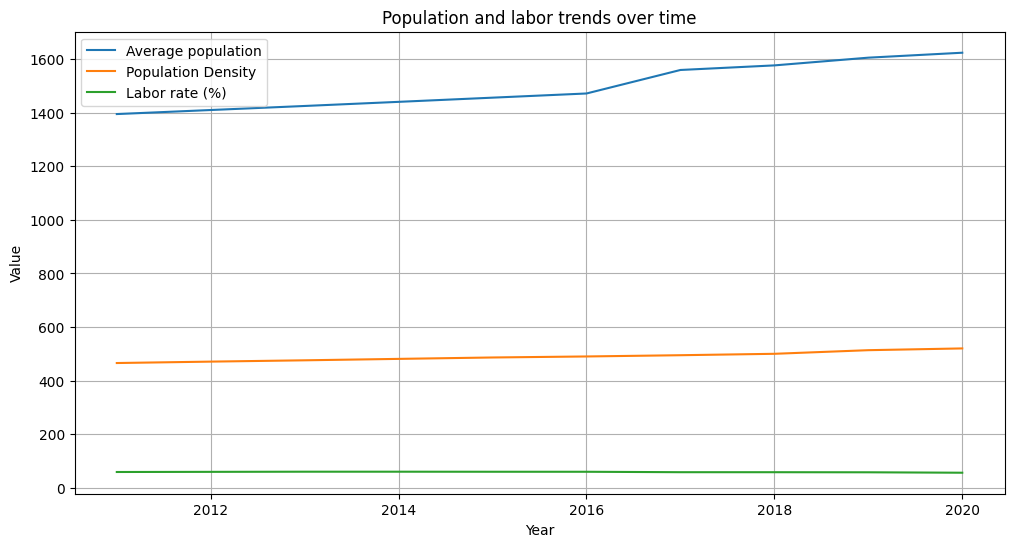

In [29]:
# Nhóm theo năm và tính trung bình các chỉ số
df_yearly = df.groupby('Year').mean(numeric_only=True).reset_index() # numeric_only để tránh lỗi với cột không phải số

# Vẽ biểu đồ đường cho các chỉ số quan trọng
plt.figure(figsize=(12, 6)) # Điều chỉnh kích thước biểu đồ
plt.plot(df_yearly['Year'], df_yearly['Average population'], label='Average population')
plt.plot(df_yearly['Year'], df_yearly['Population density'], label='Population Density')
plt.plot(df_yearly['Year'], df_yearly['Labor_rate'], label='Labor rate (%)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Population and labor trends over time')
plt.legend()
plt.grid(True) # Thêm lưới cho dễ nhìn
plt.show()

# Tương tự cho tỷ lệ tăng dân số và tỷ số giới tính

C:\Users\phucy\AppData\Local\Temp\ipykernel_8544\2920206647.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(


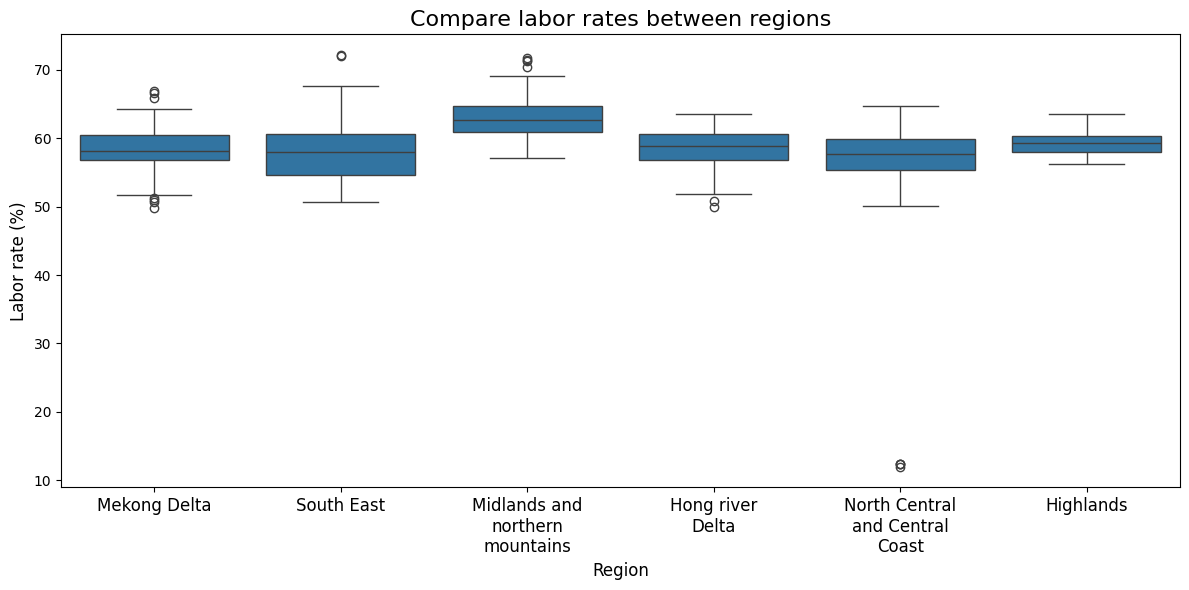

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# ... (Giả sử bạn đã có dữ liệu trong DataFrame 'df') ...

fig, ax1 = plt.subplots(figsize=(12, 6))  # Sửa: fig, ax1 = plt.figure(...) thành fig, ax1 = plt.subplots(...)

sns.boxplot(x='Region', y='Labor_rate', data=df, ax=ax1)  # Thêm ax=ax1 vào sns.boxplot()

ax1.set_xlabel('Region', fontsize=12)
ax1.set_ylabel('Labor rate (%)', fontsize=12)

regions = df['Region'].unique()  # Lấy danh sách các vùng từ DataFrame
ax1.set_xticklabels(
    [textwrap.fill(label, 15) for label in regions], 
    rotation=0, 
    fontsize=12
)

ax1.set_title('Compare labor rates between regions', fontsize=16) 

# Không cần plt.xticks() nữa vì đã đặt nhãn trong ax1.set_xticklabels()
# plt.xticks(rotation=45, fontsize=10) 

plt.tight_layout()
plt.show()

       Average population  Population density  Labor_rate   Sex ratio  \
count          630.000000          630.000000  630.000000  630.000000   
mean          1495.987937          489.976349   59.166880   99.156476   
std           1350.423316          610.978730    5.293275    3.013348   
min            300.400000           42.900000   12.002663   91.100000   
25%            858.150000          134.000000   57.060365   97.107500   
50%           1196.300000          272.000000   59.380048   98.900000   
75%           1658.725000          650.275000   61.685521  100.700000   
max           9227.600000         4476.000000   72.203735  114.100000   

       Population grow ratio  
count             630.000000  
mean                0.978778  
std                 0.834608  
min                -1.220000  
25%                 0.472500  
50%                 0.790000  
75%                 1.387500  
max                 5.300000  

Ma trận tương quan:
                     Average population  P

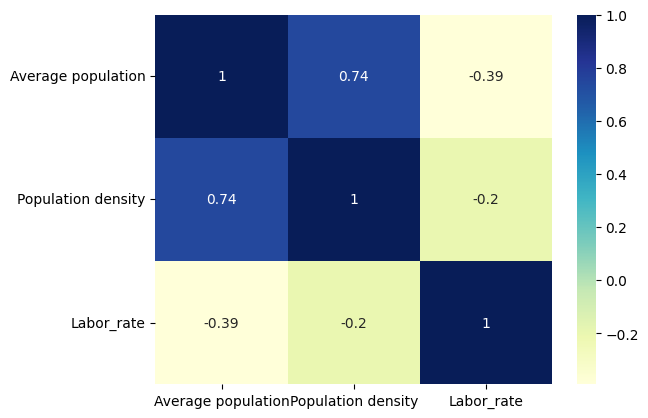

In [13]:
# Tính trung bình, độ lệch chuẩn, min, max của các chỉ số
print(df[['Average population', 'Population density', 'Labor_rate', 'Sex ratio', 'Population grow ratio']].describe())

# Tính hệ số tương quan giữa các biến
correlation_matrix = df[['Average population', 'Population density', 'Labor_rate']].corr()
print("\nMa trận tương quan:\n", correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu") # trực quan ma trận tương quan
plt.show()

Region  Highlands  Hong river Delta  Mekong Delta  \
Year                                                
2011    57.907540         59.112958     59.170713   
2012    58.529679         59.220019     59.515111   
2013    59.942407         59.982408     59.116852   
2014    60.198302         59.639247     58.767003   
2015    61.002097         58.954638     58.797620   
2016    61.123236         58.511079     59.537029   
2017    58.362693         58.941915     57.757183   
2018    57.926186         58.675097     57.914423   
2019    59.327584         56.693326     58.447384   
2020    58.056058         54.491078     57.091233   

Region  Midlands and northern mountains  North Central and Central Coast  \
Year                                                                       
2011                          62.494897                        57.064620   
2012                          63.224215                        57.788557   
2013                          64.417828                    

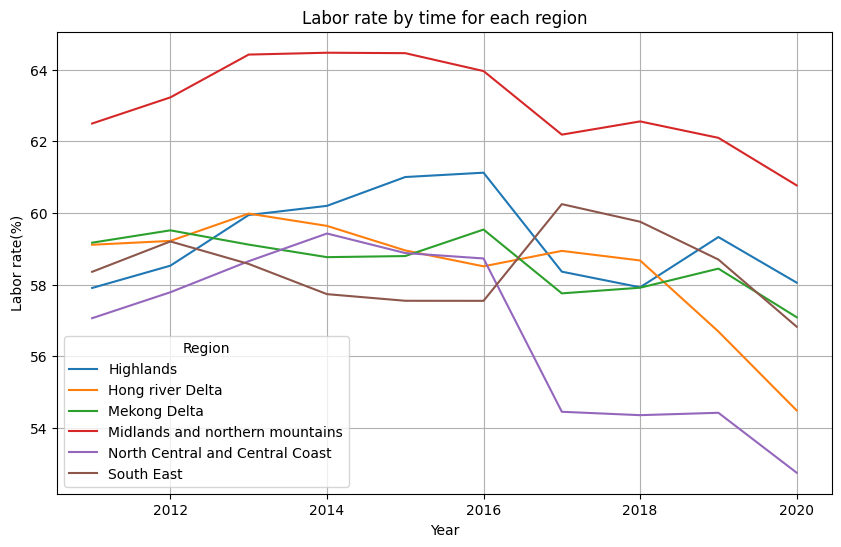

In [32]:
# Tạo pivot table để dễ dàng phân tích
pivot_df = df.pivot_table(index='Year', columns='Region', values='Labor_rate', aggfunc='mean')
print(pivot_df)

# Vẽ biểu đồ đường cho từng vùng
pivot_df.plot(kind='line', figsize=(10, 6))
plt.title('Labor rate by time for each region')
plt.xlabel('Year')
plt.ylabel('Labor rate(%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

In [23]:
import pandas as pd

# Bước 1: Đọc file CSV
file_path = "../data/cleaned/cleaned_population.csv"  # Đổi thành đường dẫn tới file của bạn
data = pd.read_csv(file_path)

# Bước 2: Kiểm tra cấu trúc dữ liệu
print(data.head())

# Giả sử các cột có tên: "Province", "Year", "Labor_15plus"
# Sắp xếp dữ liệu để đảm bảo theo tỉnh và năm
data = data.sort_values(by=["Provinces/city", "Year"]).reset_index(drop=True)

# Bước 3: Tính tỷ lệ gia tăng cho từng tỉnh
def calculate_growth_rate(group):
    group = group.sort_values(by="Year")  # Đảm bảo đúng thứ tự thời gian
    group["Growth_Rate (%)"] = group["15+ labor"].pct_change() * 100
    return group

# Áp dụng tính toán cho từng tỉnh
result = data.groupby("Provinces/city").apply(calculate_growth_rate)

# Bước 4: Xem kết quả
print(result)

# Bước 5: Lưu kết quả ra file CSV mới
result.to_csv("../data/filtered/Region/labor_growth_rate_by_province.csv", index=False)

  Provinces/city  Population density  Average population  Sex ratio  \
0         Ha Noi              2031.1              6761.3       97.8   
1      Vinh Phuc               818.0              1011.4       97.6   
2       Bac Ninh              1292.6              1063.4       96.7   
3     Quang Ninh               191.4              1168.0      105.4   
4      Hai Duong              1044.6              1729.8       96.1   

   Population grow ratio  15+ labor            Region  Year  
0                   1.93     3572.9  Hong river Delta  2011  
1                   0.38      608.3  Hong river Delta  2011  
2                   1.84      593.5  Hong river Delta  2011  
3                   0.93      675.0  Hong river Delta  2011  
4                   0.78     1071.0  Hong river Delta  2011  
                   Provinces/city  Population density  Average population  \
Provinces/city                                                              
An Giang       0         An Giang              

C:\Users\phucy\AppData\Local\Temp\ipykernel_8544\3759782497.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = data.groupby("Provinces/city").apply(calculate_growth_rate)


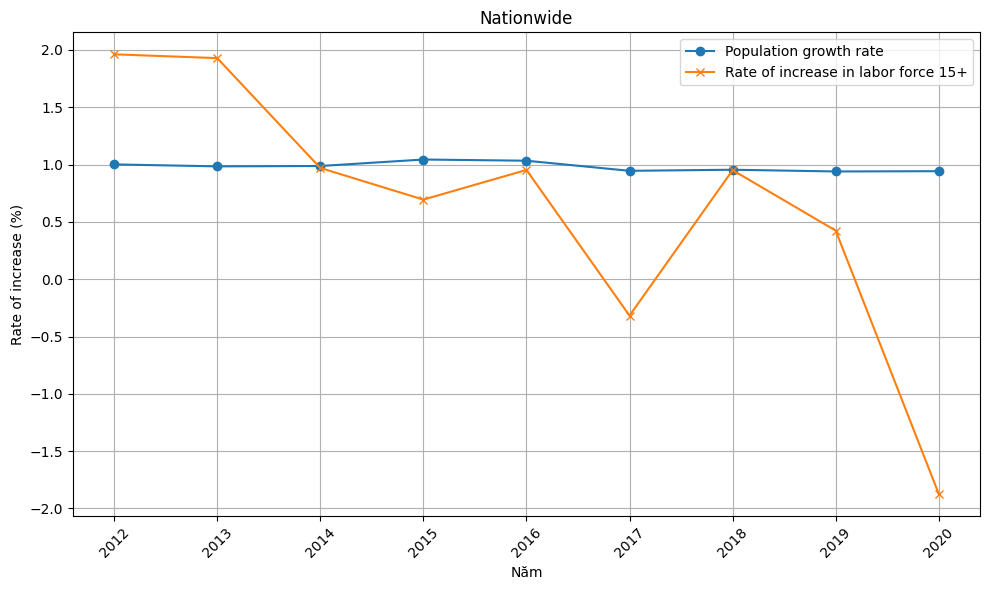

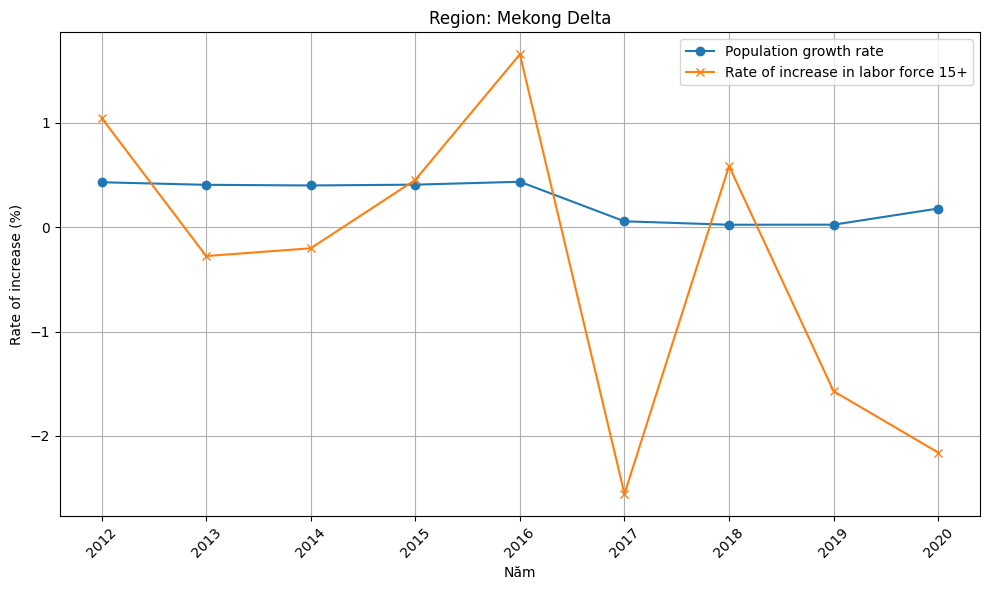

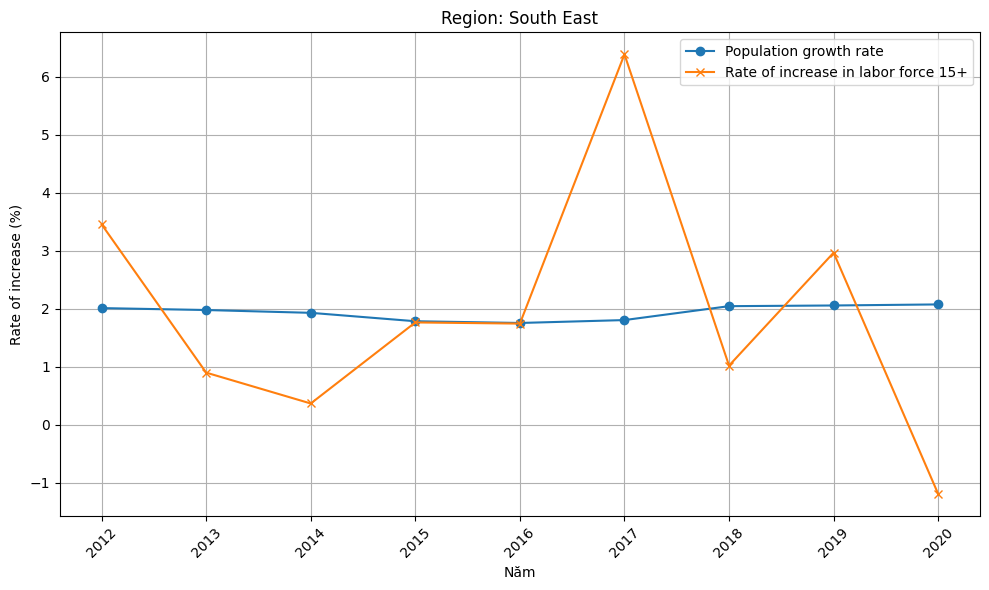

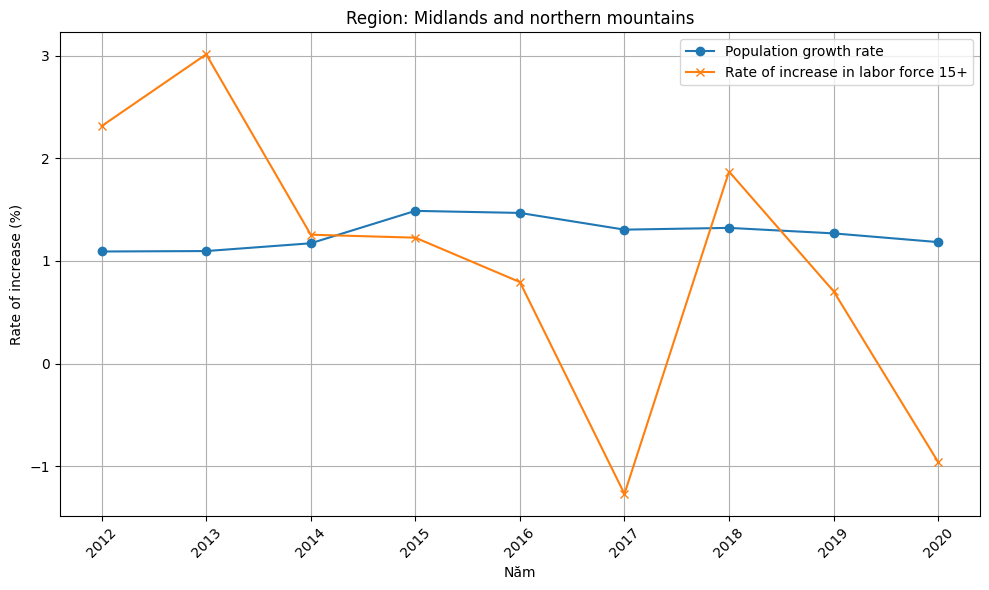

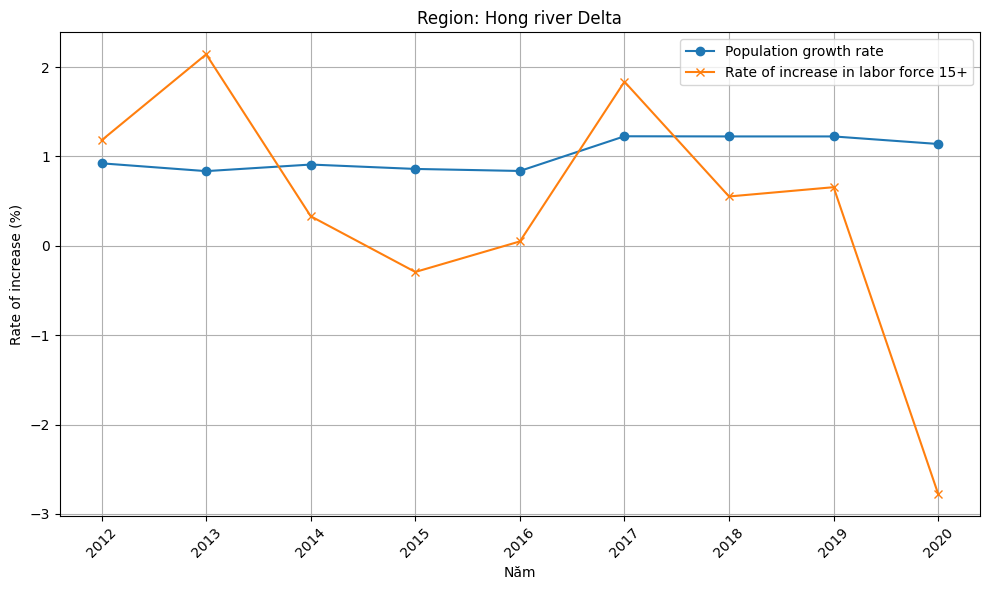

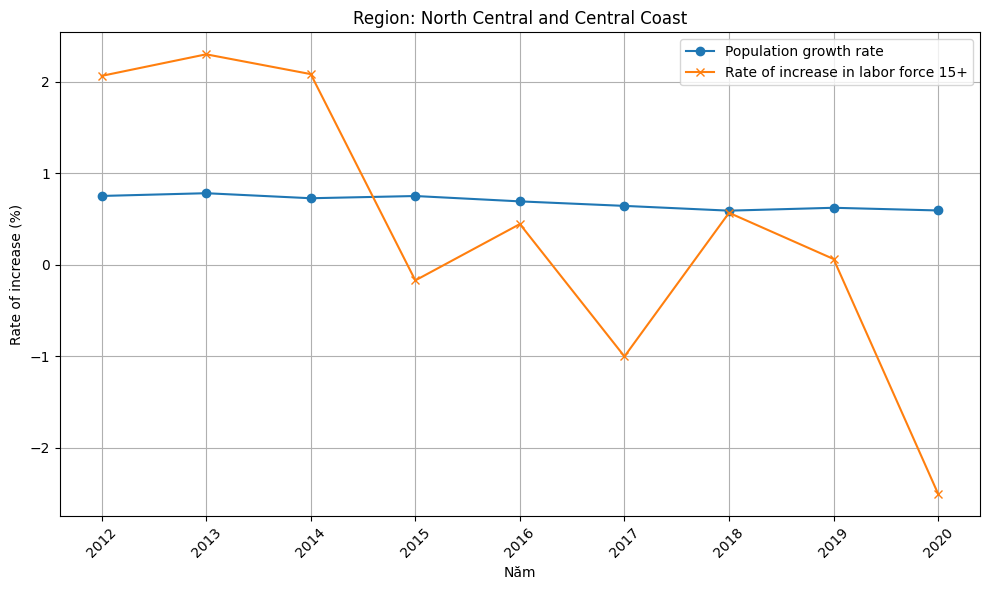

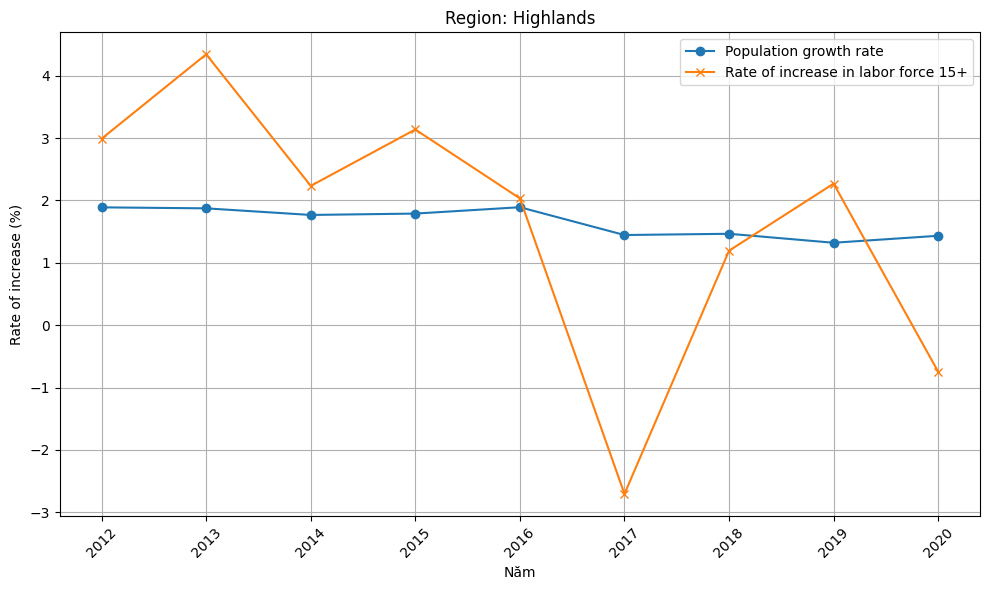

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def ve_bieu_do_so_sanh(df, cot_nam, cot_ti_le_1, ten_cot_1, cot_ti_le_2, ten_cot_2, tieu_de="The chart compares the increase rate"):
    try:
        df[cot_ti_le_1] = pd.to_numeric(df[cot_ti_le_1], errors='coerce')
        df[cot_ti_le_2] = pd.to_numeric(df[cot_ti_le_2], errors='coerce')
        df_cleaned = df.dropna(subset=[cot_ti_le_1, cot_ti_le_2])
        if df_cleaned.empty:
            print(f"Không có dữ liệu hợp lệ để vẽ biểu đồ: {tieu_de}")
            return

        plt.figure(figsize=(10, 6))
        plt.plot(df_cleaned[cot_nam], df_cleaned[cot_ti_le_1], marker='o', label=ten_cot_1)
        plt.plot(df_cleaned[cot_nam], df_cleaned[cot_ti_le_2], marker='x', label=ten_cot_2)

        plt.xlabel("Năm")
        plt.ylabel("Rate of increase (%)")
        plt.title(tieu_de)
        plt.xticks(df_cleaned[cot_nam], rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except (KeyError,TypeError) as e:
        print(f"Lỗi: {e}")
    except Exception as e:
        print(f"Lỗi không xác định: {e}")

try:
    df = pd.read_csv("../data/filtered/Region/labor_growth_rate_by_province.csv")
    #Ép kiểu dữ liệu cột 'Year'
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    # Tính tỷ lệ gia tăng lực lượng lao động 15+

    if df is not None:
        # 1. Biểu đồ cho toàn quốc:
        df_grouped = df.groupby('Year').mean(numeric_only=True).reset_index()
        ve_bieu_do_so_sanh(df_grouped, 'Year', 'Population grow ratio', "Population growth rate", 'Growth_Rate (%)', "Rate of increase in labor force 15+", "Nationwide")

        # 2. Biểu đồ theo khu vực:
        for region in df['Region'].unique():
            df_region = df[df['Region'] == region]
            df_region_grouped = df_region.groupby('Year').mean(numeric_only=True).reset_index()
            ve_bieu_do_so_sanh(df_region_grouped, 'Year', 'Population grow ratio', "Population growth rate", 'Growth_Rate (%)', "Rate of increase in labor force 15+", f"Region: {region}")
    else:
        print("Đã xảy ra lỗi khi tính toán tỷ lệ gia tăng.")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file CSV. Hãy kiểm tra đường dẫn.")
except Exception as e:
    print(f"Lỗi không xác định: {e}")